**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import re

from string import punctuation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

**LOADING DATA**

In [2]:
train= pd.read_csv('train_set.csv')
test= pd.read_csv('test_set.csv')

In [3]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


**DATA OVERVIEW**

In [4]:
train=train[0:1000]

In [5]:
train.shape

(1000, 2)

In [6]:
train['lang_id'].value_counts()

ven    105
nso     96
eng     95
ssw     94
afr     93
zul     89
tsn     88
sot     87
xho     86
nbl     84
tso     83
Name: lang_id, dtype: int64

<AxesSubplot:xlabel='lang_id', ylabel='count'>

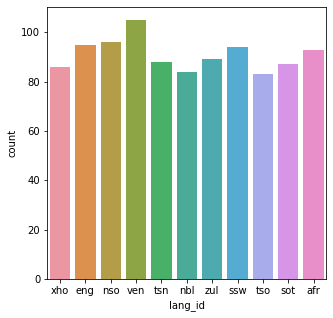

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(train['lang_id'])

In [8]:
train['text'][4]

'khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso'

**DATA PREPROCESSING**

In [9]:
def text_clean(text):
    #let's removing punctuation
    res = text.apply(lambda x: ''.join(i for i in x if i not in punctuation))
    res = res.str.lower()
    return text

In [10]:
train['clean_text'] = text_clean(train['text'])
test['clean_text'] = text_clean(test['text'])
train.head()

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [11]:
# Splitting out X (indepedent) and Y (target/dependent) variables
X = train['text']
y = train['lang_id']

In [12]:
# Splitting of Training and Validation Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**MODEL BUILDING**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
vectorizer = TfidfVectorizer(ngram_range=(1,5))

lr1 = Pipeline([
    ('vectorizer', vectorizer),
    ('clf', LogisticRegression(C=1000))
])

In [14]:
lr1.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 5))),
                ('clf', LogisticRegression(C=1000))])

In [15]:
y_predicted = lr1.predict(X_test)

In [16]:
from sklearn import metrics
acc = (metrics.accuracy_score(y_test, y_predicted))*100
print(acc, '%')

93.5 %


In [17]:
matrix = metrics.confusion_matrix(y_test, y_predicted)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[22  0  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0 12  0  0  0  0  0  1  0  1]
 [ 0  0  0 15  0  0  2  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0  3]
 [ 0  0  0  0  0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0  0]
 [ 0  0  0  0  0  0  0  0 20  0  0]
 [ 0  0  0  1  0  0  0  0  0 14  0]
 [ 0  0  1  0  0  3  0  0  0  1 15]]


**CONCLUSION**

In [ ]:
The Linear Regression model performed better on unseen data with the accuracy score of 93.5%.

In [18]:
test_pred = lr1.predict(test['clean_text'])
my_submission = pd.DataFrame({'index': test['index'], 'lang_id': test_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission1.csv', index=False)